In [12]:
# Gives the discrete, linear convolution of two one-dimensional sequences.
# some goodies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import convolutionF as F
from scipy.stats import norm

In [13]:
x = np.arange(-50, 50, 1./3)
dx = x[1]-x[0]

In [14]:
def gauss(x, amplitude, position, sigma):
    return amplitude/np.sqrt(2*np.pi)/sigma * np.exp( -(x-position)**2/2./sigma**2)

<function matplotlib.pyplot.show>

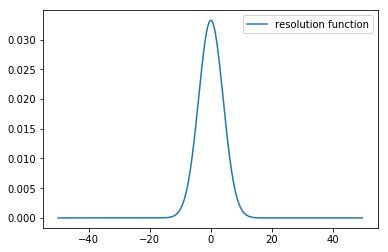

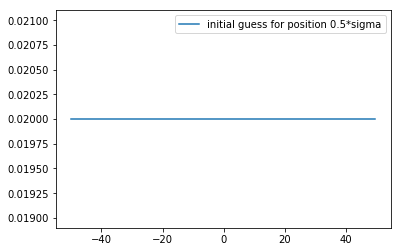

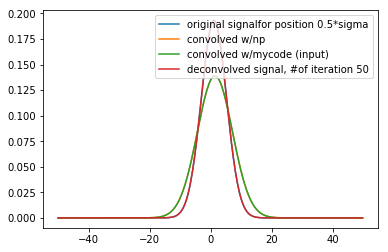

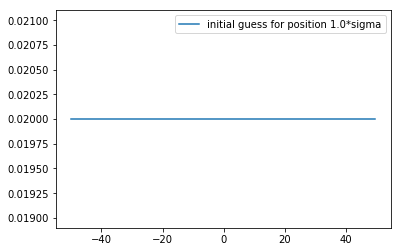

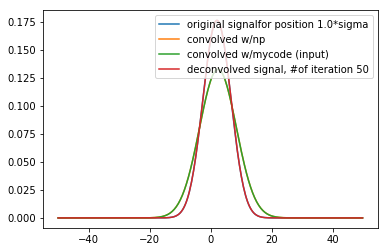

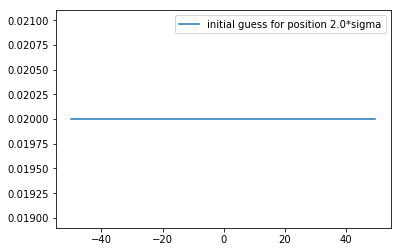

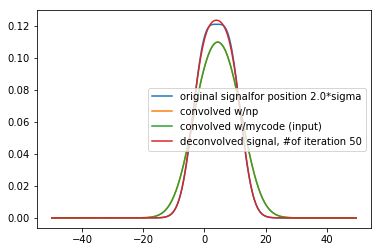

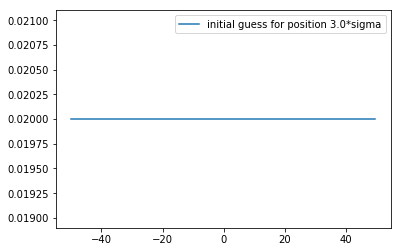

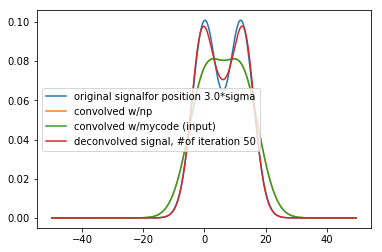

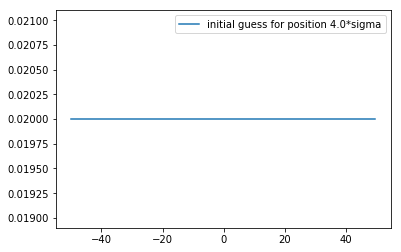

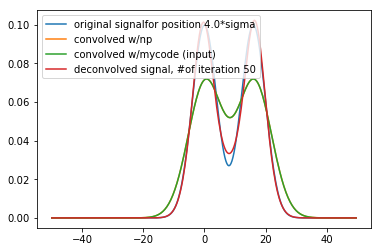

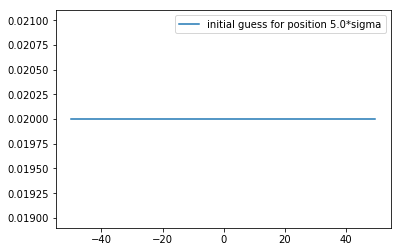

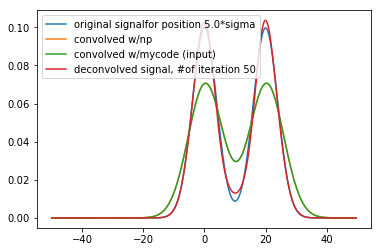

In [16]:
position=[0.5, 1., 2., 3., 4., 5.]

sig=0*np.ones(len(x))
RF=gauss(x, 1., 0., 4)*dx
plt.figure() #plot the resolution function
plt.plot(x,RF,label='resolution function')
plt.legend()
S=0*np.ones(len(x))
Stest=0*np.ones(len(x))
S_sum=0.0
ini=0*np.ones(len(x))
I=0*np.ones(len(x))
for p in position:
    sigma=4.
    sig=gauss(x, 1., 0., 4.) + gauss(x, 1., p*sigma, 4) 
    S=F.convolve(sig,RF,'same') #convolved signal 
    Stest=np.convolve(sig,RF,'same')
    S_sum=np.sum(S,0) #summation of the convolved signal
    ini=S_sum/len(S) * np.ones(len(S))#initial guess
    plt.figure() #plot the initial guess
    plt.plot(x,ini, label='initial guess for position {}*sigma'.format(p))
    plt.legend()
    g='same'
    no_iteration=50
    I=F.deconvolve(S,RF,ini,g,'iteration',no_iteration)  #deconvolved signal  
    plt.figure() #plot the deconvolved signal with original signal
    plt.plot(x,sig, label='original signalfor position {}*sigma'.format(p))
    plt.plot(x,Stest,label='convolved w/np')
    plt.plot(x,S,label='convolved w/mycode (input)')
    plt.plot(x,I,label='deconvolved signal, #of iteration {}'.format(no_iteration))
    plt.legend()
plt.show 
